In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ex2data1 = np.loadtxt("data/ex2data1.txt", delimiter=",")

exam_1_score = ex2data1[:, 0]
exam_2_score = ex2data1[:, 1]

X = ex2data1[:, :2]
y = ex2data1[:, -1]

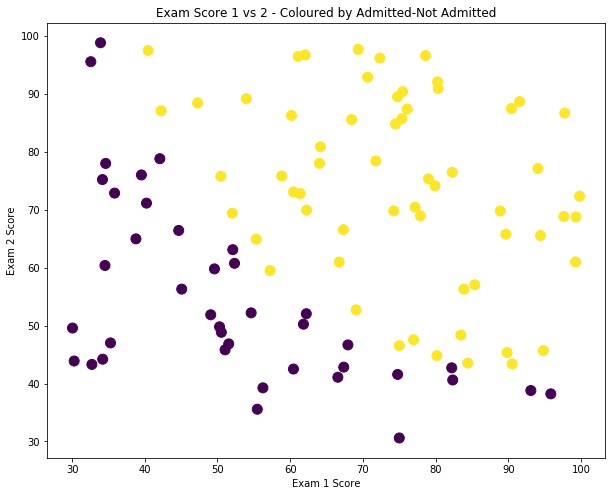

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(exam_1_score, exam_2_score, c=ex2data1[:, -1], s=100)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Exam Score 1 vs 2 - Coloured by Admitted-Not Admitted");

In [22]:
class LogisticRegression:
    

    def __init__(self,
                 X,
                 y,
                 alfa=0.001,
                 num_iter=100000,
                 fit_intercept=True,
                 weights_to_initialise=0,
                 verbose=True):

        self.X = X
        self.y = y.reshape(len(y), 1)

        self._fit_intercept = fit_intercept
        self._alfa = alfa
        self._num_iter = num_iter
        self._m = X.shape[0]
        self._n = (X.shape[1] + 1) if fit_intercept else len(X.shape[1])

        self.thetas = None
        self._temp_thetas = None
        self._verbose = verbose
        
        self._add_constant()
        self._initalise_θ(weights_to_initialise)


    def _add_constant(self):
        if self._fit_intercept:
            constants = np.ones((self._m, 1))
            self.X = np.concatenate((constants, self.X), axis=1)


    def _initalise_θ(self, weight_to_initialise):
        self.thetas = np.zeros(
            self._n
        ) + weight_to_initialise
        self._temp_thetas = self.thetas


    def _sigmoid(self, z):
        return (1 / (1 + np.exp(-z)))


    def _h(self):
        z = (self.X @ self.thetas.reshape(-1, 1))
        return self._sigmoid(z)


    def _calculate_cost(self):
        epsilon = 1e-5 # to silence the "RuntimeWarning: divide by zero encountered in log" errors
        h = self._h()
        return np.mean(-1 * (
            (self.y) * np.log(h + epsilon)
            + (1 - self.y) * np.log(1 - h + epsilon)
        ))


    def _gradient(self):
        h = self._h()
        return ((1 / self._m) * self.X.T @ (h - self.y)).flatten()


    def fit(self):
        for i in range(self._num_iter):
            self.thetas -= self._alfa * self._gradient()
            if (self._verbose) and (i % 50000 == 0):
                print(f"COST: {self._calculate_cost()}")
                print(self.thetas)


    def predict_prob(self):
        return self._sigmoid(log.X @ log.thetas)


    def predict_prob_single_instance(self, index):
        prob_matrix = self._sigmoid(log.X @ log.thetas)
        
        exam_scores = f"Exam Score 1: %.3f\nExam Score 2: %.3f" % (self.X[index, 1], self.X[index, 2])
        probability = "Probability of Being Admitted: %.2f%%" % (prob_matrix[index] * 100)
        print(exam_scores); print(probability)


    def predict(self):
        probabilities = self.predict_prob()
        probabilities[probabilities > 0.5] = 1
        probabilities[probabilities <= 0.5] = 0
        return probabilities


def calculate_decision_boundary_values(coefficients, X):
    x1 = X[:, 1]
    x2 = (-1/coefficients[2])*(coefficients[0] + coefficients[1]*x1)
    return x1, x2


def plot_decision_boundary(coefficients, X):
    x1, x2 = calculate_decision_boundary_values(coefficients, X)
    plt.plot(x1,x2,'r-',label='Decision Boundary');

In [23]:
#COST: 0.20348330288326974
#WEIGHTS: -25.16133356   0.20623171   0.2014716
log = LogisticRegression(X,
                         y,
                         alfa=0.001,
                         num_iter=10**6,
                         weights_to_initialise=np.array([-25.16133356, 0.20623171, 0.2014716]))

In [24]:
log._calculate_cost()

0.20348330288370892

In [25]:
probabilities = log.predict()

In [26]:
log.fit()

COST: 0.2034833028835238
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326977
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326985
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.2034833028832697
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716 ]
COST: 0.20348330288326974
[-25.16133356   0.20623171   0.2014716

# Plotting the Decision Boundary

Please refer to [link](https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary)  for deriving the decision boundary equation.

----

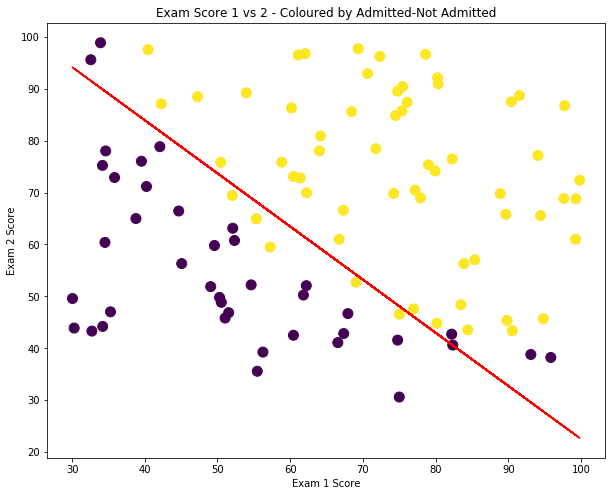

In [21]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(exam_1_score, exam_2_score, c=ex2data1[:, -1], s=100)

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Exam Score 1 vs 2 - Coloured by Admitted-Not Admitted")
plot_decision_boundary(log.thetas, log.X)